In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import cv2
import copy

In [2]:
train_data=pd.read_csv(r'C:\D\IDO_ML\data\RAW spectra data\IDO_RAW_DATA_0422.CSV')
list_x=[-6,-5,-3,-2,-1,0,1,2,4,5]
list_y=[-2,2,4,-1,-5,1,3,-2,2,-3]
list_t=zip(list_x,list_y)
results_filt=pd.DataFrame()
for x,y in list_t:
    temp=train_data[(train_data['X']==x)&(train_data['Y']==y)]
    results_filt=pd.concat([results_filt,temp])
new_data=results_filt.copy()    
part=new_data.iloc[:,1:16]
for item in part.keys():
    new_data[item]=new_data[item]/new_data['Wavelength']

In [3]:
data_array=new_data.values.reshape((-1,993,20,1))[:,:,2:16].astype('float32')

In [4]:
def normal(array):
    results=np.zeros((data_array.shape))
    for i in range(len(array)):
        results[i,:,:,0]=(data_array[i,:,:,0]-data_array[i,:,:,0].mean(axis=0))/(3*data_array[i,:,:,0].std(axis=0))
    return results

In [5]:
data_array_nor=normal(data_array)

In [6]:
label_data=pd.read_csv(r'C:\D\IDO_ML\data\RAW spectra data\IDO_LABEL.csv')
list_x=[-6,-5,-3,-2,-1,0,1,2,4,5]
list_y=[-2,2,4,-1,-5,1,3,-2,2,-3]
list_t=zip(list_x,list_y)
results_label=pd.DataFrame()
for x,y in list_t:
    temp=label_data[(label_data['DieX']==x)&(label_data['DieY']==y)]
    results_label=pd.concat([results_label,temp])

In [7]:
data_label=results_label.pop('X_Overlay')

In [8]:
data_label=data_label.values

In [9]:
data_label.shape

(1170,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
X_train, X_val, y_train, y_val = train_test_split(data_array_nor, data_label, test_size=0.1, random_state=42)

# building model

In [11]:
from tensorflow.keras import layers,models

model = models.Sequential()
model.add(layers.Conv2D(32, (8, 2), activation='relu',
                        input_shape=(993, 14, 1)))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.Conv2D(64, (8, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.Conv2D(128, (8, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.Conv2D(128, (8, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 986, 13, 32)       544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 493, 13, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 486, 12, 64)       32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 243, 12, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 236, 11, 128)      131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 118, 11, 128)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 10, 128)      2

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='mse',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['mse'])

In [16]:
history=model.fit(X_train, y_train, epochs=80,batch_size=100,validation_data=[X_val, y_val])

Train on 1053 samples, validate on 117 samples
Epoch 1/80
1053/1053 [==============================] - 84s 80ms/sample - loss: 1.5859 - mse: 1.5859 - val_loss: 0.9548 - val_mse: 0.9548
Epoch 2/80
1053/1053 [==============================] - 86s 82ms/sample - loss: 1.2966 - mse: 1.2966 - val_loss: 1.1822 - val_mse: 1.1822
Epoch 3/80
1053/1053 [==============================] - 85s 80ms/sample - loss: 1.4185 - mse: 1.4185 - val_loss: 1.2563 - val_mse: 1.2563
Epoch 4/80
1053/1053 [==============================] - 85s 80ms/sample - loss: 1.3446 - mse: 1.3446 - val_loss: 1.0414 - val_mse: 1.0414
Epoch 5/80
1053/1053 [==============================] - 86s 81ms/sample - loss: 1.3939 - mse: 1.3939 - val_loss: 0.9421 - val_mse: 0.9421
Epoch 6/80
1053/1053 [==============================] - 85s 80ms/sample - loss: 1.2850 - mse: 1.2850 - val_loss: 0.9293 - val_mse: 0.9293
Epoch 7/80
1053/1053 [==============================] - 85s 80ms/sample - loss: 1.2470 - mse: 1.2470 - val_loss: 1.4765 - val

1053/1053 [==============================] - 83s 79ms/sample - loss: 0.8696 - mse: 0.8696 - val_loss: 0.5876 - val_mse: 0.5876
Epoch 60/80
1053/1053 [==============================] - 84s 79ms/sample - loss: 0.7372 - mse: 0.7372 - val_loss: 0.6269 - val_mse: 0.6269
Epoch 61/80
1053/1053 [==============================] - 84s 80ms/sample - loss: 0.7733 - mse: 0.7733 - val_loss: 0.5705 - val_mse: 0.5705
Epoch 62/80
1053/1053 [==============================] - 83s 78ms/sample - loss: 0.6576 - mse: 0.6576 - val_loss: 1.0515 - val_mse: 1.0515
Epoch 63/80
1053/1053 [==============================] - 89s 84ms/sample - loss: 0.6804 - mse: 0.6804 - val_loss: 0.6353 - val_mse: 0.6353
Epoch 64/80
1053/1053 [==============================] - 103s 98ms/sample - loss: 0.7425 - mse: 0.7425 - val_loss: 0.6193 - val_mse: 0.6193
Epoch 65/80
1053/1053 [==============================] - 100s 95ms/sample - loss: 0.7272 - mse: 0.7272 - val_loss: 0.6467 - val_mse: 0.6467
Epoch 66/80
1053/1053 [==============

In [ ]:
import numpy as np

k = 1
num_val_samples = len(X_train) // k
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model.compile(loss='mse',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['mse'])
    # Train the model (in silent mode, verbose=0)
    history=model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=100, verbose=2,validation_data=[val_data, val_targets])
    # Evaluate the model on the validation data
    all_scores.append(history.history[val_loss])

processing fold # 0
Epoch 1/20


In [ ]:
all_scores

In [18]:
model.save('IDO_0423_CNN_largets.h5')

In [ ]:
history.history

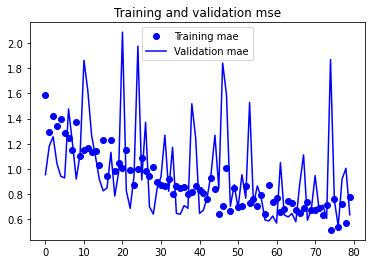

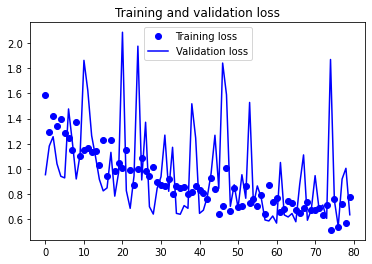

In [17]:
import matplotlib.pyplot as plt

mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mae')
plt.plot(epochs, val_mse, 'b', label='Validation mae')
plt.title('Training and validation mse')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
predict=model.predict(X_val)
true=y_val
import scipy

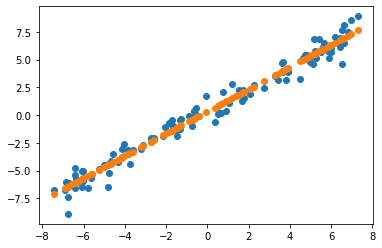

In [23]:
p1=np.polyfit(predict.reshape(117),true.reshape(117),1)
fit=np.polyval(p1,predict.reshape(117))
plt.scatter(predict,true)
plt.scatter(predict,fit)

In [25]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(predict.reshape(117),true.reshape(117))

In [26]:
r_value

0.9871032873061397

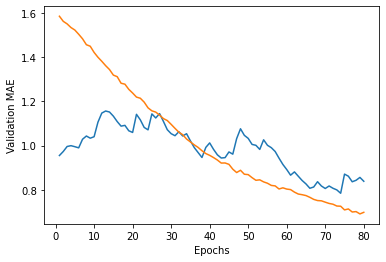

In [37]:
def smooth_curve(points, factor=0.92):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(val_mse)
smooth_mse_history = smooth_curve(mse)

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(smooth_mse_history) + 1), smooth_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()